In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
# from jupyterthemes import jtplot
# jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [2]:
df_bus_stops = pd.read_csv("../files/bus_stops.csv")
df_births = pd.read_csv("../files/births.csv")
df_deaths = pd.read_csv("../files/deaths.csv")
df_accidents_2017 = pd.read_csv("../files/accidents_2017.csv")
df_immigrants_by_nationality = pd.read_csv("../files/immigrants_by_nationality.csv")
df_transports = pd.read_csv("../files/transports.csv")
df_immigrants_emigrants_by_destination2 = pd.read_csv("../files/immigrants_emigrants_by_destination2.csv")
df_immigrants_emigrants_by_destination = pd.read_csv("../files/immigrants_emigrants_by_destination.csv")
df_unemployment = pd.read_csv("../files/unemployment.csv")

In [3]:
def print_uniques(df, max_print=5):
    """
    Imprime el nombre de la columna y sus valores únicos.
    :param df: dataframe sobre el que se trabaja
    :return:
    """
    print("\n ----- Valores únicos ----- \n")
    for (columnName, columnData) in df.iteritems():
        if len(columnData.unique()) <= max_print:
            print(columnName, ': ', columnData.unique())
        else:
            print(columnName, ': ', columnData.unique()[0:max_print], " ...")
    return

# Emigración, inmigración y desempleo por distrito

#### df_immigrants_emigrants_by_destination (emigración e inmigración por CCAA)

                   from         to  weight
0                Abroad  Barcelona   53085
15            Barcelona  Catalonia   35036
30            Catalonia  Barcelona   28779
5             Barcelona     Abroad    5485
32  Community of Madrid  Barcelona    2942

 ----- Valores únicos ----- 

from :  ['Abroad' 'Barcelona' 'Catalonia' 'Community of Madrid' 'Andalusia'
 'Valencian Community' 'Balearic Islands' 'Galicia' 'Canary Islands'
 'Castile and León']  ...
to :  ['Barcelona' 'Catalonia' 'Abroad' 'Community of Madrid'
 'Valencian Community' 'Andalusia' 'Balearic Islands' 'Galicia'
 'Canary Islands' 'Aragon']  ...
weight :  [53085 35036 28779  5485  2942  2647  2416  2305  1711  1634]  ...


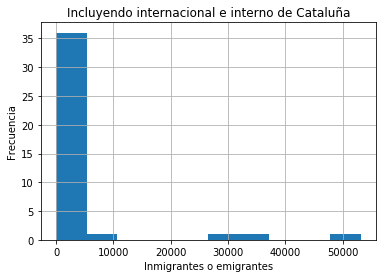

In [4]:
print(df_immigrants_emigrants_by_destination.sort_values(by='weight', ascending=False).head(5))
print_uniques(df_immigrants_emigrants_by_destination.sort_values(by='weight', ascending=False), 10)
# fig, (ax1, ax2) = plt.subplots(1, 2)
df_immigrants_emigrants_by_destination.sort_values(by='weight', ascending=False).hist()
plt.xlabel("Inmigrantes o emigrantes")
plt.ylabel("Frecuencia")
plt.title("Incluyendo internacional e interno de Cataluña")
plt.savefig("images/inmigrantes-emigrantes-ccaa-incluyendo-top")

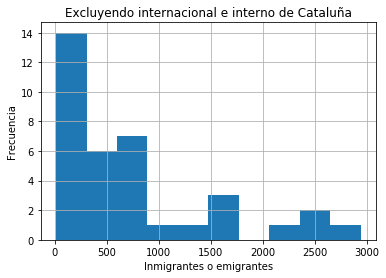

In [5]:
df_immigrants_emigrants_by_destination.sort_values(by='weight', ascending=False).tail(-4).hist()
plt.xlabel("Inmigrantes o emigrantes")
plt.ylabel("Frecuencia")
plt.title("Excluyendo internacional e interno de Cataluña")
plt.savefig("images/inmigrantes-emigrantes-ccaa-excluyendo-top")

#### df_immigrants_emigrants_by_destination2 (emigración e inmigración por distrito)

         from              to  weight
311    Abroad        Eixample   11473
310    Abroad    Ciutat Vella    8586
317    Abroad      Sant Martí    6601
318    Abroad  Sants-Montjuïc    5903
26   Eixample       Catalonia    5409

 ----- Valores únicos ----- 

from :  ['Abroad' 'Eixample' 'Sants-Montjuïc' 'Sant Martí' 'Catalonia'
 'Nou Barris' 'Horta-Guinardó' 'Sant Andreu' 'Ciutat Vella' 'Gràcia']  ...
to :  ['Eixample' 'Ciutat Vella' 'Sant Martí' 'Sants-Montjuïc' 'Catalonia'
 'Nou Barris' 'Gràcia' 'Sarrià-Sant Gervasi' 'Horta-Guinardó'
 'Sant Andreu']  ...
weight :  [11473  8586  6601  5903  5409  5143  5025  4398  4111  4031]  ...


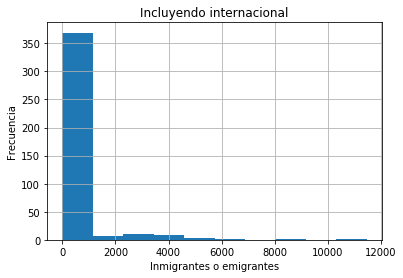

In [6]:
print(df_immigrants_emigrants_by_destination2.sort_values(by='weight', ascending=False).head(5))
print_uniques(df_immigrants_emigrants_by_destination2.sort_values(by='weight', ascending=False), 10)
# fig, (ax1, ax2) = plt.subplots(1, 2)
df_immigrants_emigrants_by_destination2.sort_values(by='weight', ascending=False).hist()
plt.xlabel("Inmigrantes o emigrantes")
plt.ylabel("Frecuencia")
plt.title("Incluyendo internacional")
plt.savefig("images/inmigrantes-emigrantes-distrito-incluyendo-top")

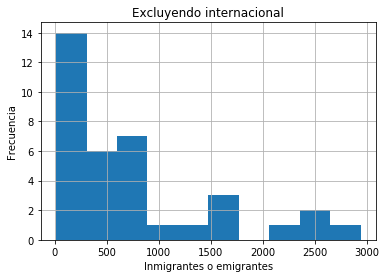

In [7]:
df_immigrants_emigrants_by_destination.sort_values(by='weight', ascending=False).tail(-4).hist()
plt.xlabel("Inmigrantes o emigrantes")
plt.ylabel("Frecuencia")
plt.title("Excluyendo internacional")
plt.savefig("images/inmigrantes-emigrantes-distrito-excluyendo-top")

#### df_immigrants_emigrants_by_destination2 (emigración e inmigración por distrito)


 ----- Valores únicos ----- 

Year :  [2013 2014 2015 2016 2017]
Month :  ['April' 'March' 'February' 'January' 'May' 'November' 'December' 'June'
 'July' 'October']  ...
District Code :  [ 1  9  3  2  6 10  4  7  8  5]  ...
District Name :  ['Ciutat Vella' 'Sant Andreu' 'Sants-Montjuïc' 'Eixample' 'Gràcia'
 'Sant Martí' 'Les Corts' 'Horta-Guinardó' 'Nou Barris'
 'Sarrià-Sant Gervasi']  ...
Neighborhood Code :  [ 1 60 11  9 31  6 64 19 37 18]  ...
Neighborhood Name :  ['el Raval' 'Sant Andreu' 'el Poble Sec' "la Nova Esquerra de l'Eixample"
 'la Vila de Gràcia' 'la Sagrada Família' "el Camp de l'Arpa del Clot"
 'les Corts' 'el Carmel' 'Sants']  ...
Gender :  ['Male' 'Female']
Demand_occupation :  ['Registered unemployed' 'Unemployment demand']
Number :  [3094 3063 3050 3012 2960 2873 2864 2861 2844 2830]  ...


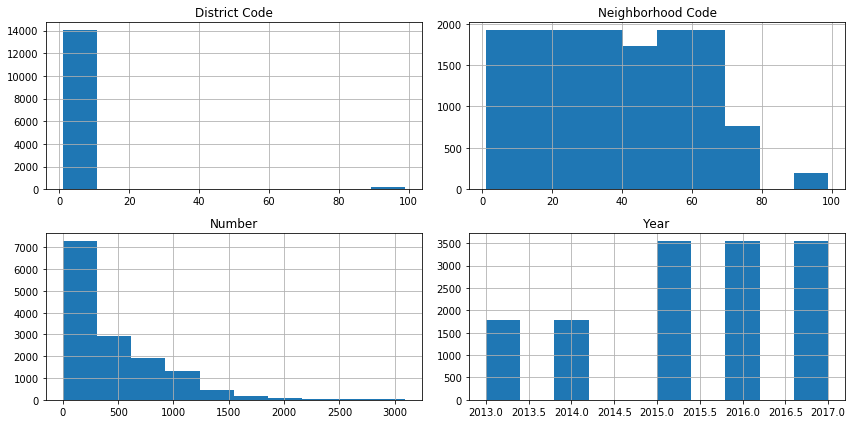

In [73]:
# print(df_unemployment.sort_values(by='Number', ascending=False).head(5))
print_uniques(df_unemployment.sort_values(by='Number', ascending=False), 10)
# fig, (ax1, ax2) = plt.subplots(1, 2)
df_unemployment.hist(figsize=(12,6))
# plt.xlabel("Inmigrantes o emigrantes")
# plt.ylabel("Frecuencia")
# plt.title("Incluyendo internacional")
plt.tight_layout()
plt.savefig("images/unemployment-distrito")

In [9]:
print_uniques(df_unemployment[df_unemployment["Year"] == 2014], 15)
print("-"*50)
print_uniques(df_unemployment[df_unemployment["Year"] == 2016], 15)


 ----- Valores únicos ----- 

Year :  [2014]
Month :  ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
District Code :  [ 1  2  3  4  5  6  7  8  9 10 99]
District Name :  ['Ciutat Vella' 'Eixample' 'Sants-Montjuïc' 'Les Corts'
 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu' 'Sant Martí' 'No consta']
Neighborhood Code :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]  ...
Neighborhood Name :  ['el Raval' 'el Barri Gòtic' 'la Barceloneta'
 'Sant Pere, Santa Caterina i la Ribera' 'el Fort Pienc'
 'la Sagrada Família' "la Dreta de l'Eixample"
 "l'Antiga Esquerra de l'Eixample" "la Nova Esquerra de l'Eixample"
 'Sant Antoni' 'el Poble Sec' 'la Marina del Prat Vermell'
 'la Marina de Port' 'la Font de la Guatlla' 'Hostafrancs']  ...
Gender :  ['Male' 'Female']
Demand_occupation :  ['Registered unemployed']
Number :  [2864  703  741 1025  914 1481  950 1137 1639 1235 1896   93 1194  472
  510]  ...


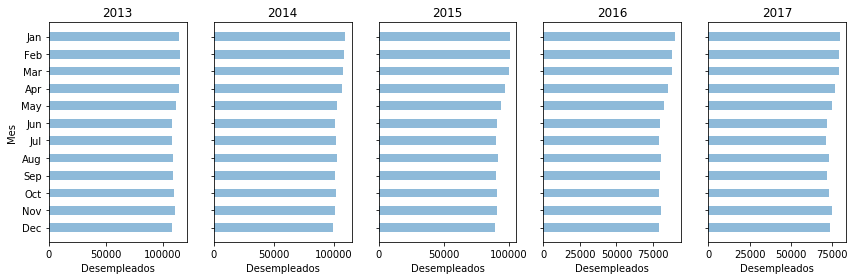

In [10]:
# Desempleo por mes
Years = list(range(2013, 2018))
year =2020
trad      = {'October': datetime.datetime(day=1, month=10, year=year),
             'September': datetime.datetime(day=1, month=9, year=year),
             'December': datetime.datetime(day=1, month=12, year=year),
             'July': datetime.datetime(day=1, month=7, year=year),
             'May': datetime.datetime(day=1, month=5, year=year),
             'June': datetime.datetime(day=1, month=6, year=year),
             'January': datetime.datetime(day=1, month=1, year=year),
             'April': datetime.datetime(day=1, month=4, year=year),
             'March': datetime.datetime(day=1, month=3, year=year),
             'November': datetime.datetime(day=1, month=11, year=year),
             'February': datetime.datetime(day=1, month=2, year=year),
             'August': datetime.datetime(day=1, month=8, year=year)
             }

fig, axs = plt.subplots(1, 5, figsize=(12, 4), sharey=True)
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
width=15
for i, year in enumerate(Years):
    temp= df_unemployment[df_unemployment["Year"] == year]
    temp = temp[temp["Demand_occupation"]=="Registered unemployed"].groupby(by=["Month"]).sum()
    temp.index = temp.index.map(trad)
    axs[i].barh(temp.index, temp["Number"], width, alpha=0.5, label=year)

    axs[i].yaxis.set_major_locator(locator)
    axs[i].yaxis.set_major_formatter(fmt)
    axs[i].set_title(year)
#     axs[i].set_yscale("log")
    axs[i].invert_yaxis()
    axs[0].set_ylabel("Mes")
    axs[i].set_xlabel("Desempleados")
    
    

plt.tight_layout()

plt.savefig("images/unemployment-years-months")

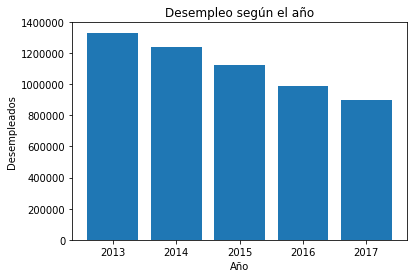

In [11]:
# por año
temp = df_unemployment[df_unemployment["Demand_occupation"]=="Registered unemployed"].groupby(by=["Year"]).sum()
plt.bar(temp.index, temp["Number"])
plt.xlabel("Año")
plt.ylabel("Desempleados")
plt.title("Desempleo según el año")
plt.savefig("images/unemployment-years")

# Transportes, accidentes y mortalidad

#### transports.csv


 ----- Valores únicos ----- 

Code :  ['K001' 'K002' 'K011' 'K008' 'K003' 'K004' 'K010' 'K009']
Transport :  ['Underground' 'Railway (FGC)' 'Tram' 'Maritime station' 'RENFE'
 'Airport train' 'Cableway' 'Funicular']
Longitude :  [2.11937  2.135427 2.185391 2.174473 2.168588 2.168507 2.118998 2.083994
 2.142987 2.158326]  ...
Latitude :  [41.399203 41.397791 41.451492 41.460889 41.3872   41.387706 41.398967
 41.362753 41.424923 41.392331]  ...
Station :  ["FGC (L6) - REINA ELISENDA (Sortida Duquesa d'Orleans)-"
 'FGC (L6) - LA BONANOVA-' "METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-"
 'METRO (L11) - CIUTAT MERIDIANA (C. Pedraforca)-'
 'METRO (L1) - CATALUNYA (Rda. Universitat)-'
 'METRO (L1) - CATALUNYA (Rambla de Catalunya)-'
 'FGC (L6) - REINA ELISENDA-' 'METRO (L5) - SANT ILDEFONS-'
 "METRO (L3, L5) - VALL D'HEBRON (C. de les Basses d'Horta)-"
 'FGC - PROVENÇA (C. de Provença)-']  ...
District.Name :  ['Sarrià-Sant Gervasi' 'Nou Barris' 'Eixample' nan 'Horta-Guinardó'
 'Sants-Montju

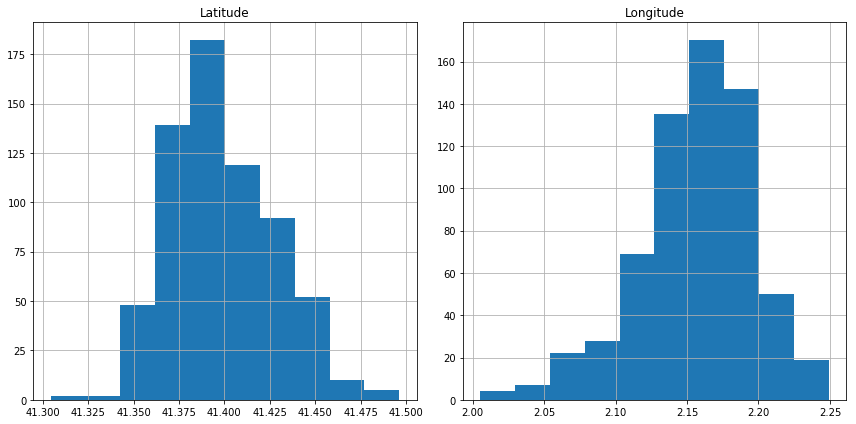

In [12]:
# print(df_unemployment.sort_values(by='Number', ascending=False).head(5))
print_uniques(df_transports, 10)
# fig, (ax1, ax2) = plt.subplots(1, 2)
df_transports.hist(figsize=(12,6))
# plt.xlabel("Inmigrantes o emigrantes")
# plt.ylabel("Frecuencia")
# plt.title("Incluyendo internacional")
plt.tight_layout()
plt.savefig("images/transports-lat-lon")

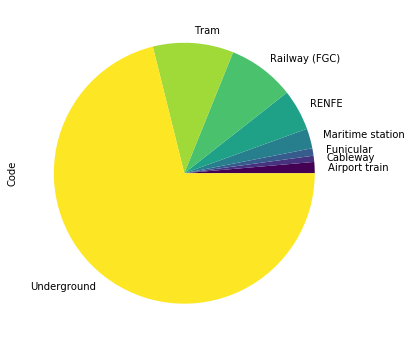

In [60]:
df_transports.groupby(by="Transport").count()["Code"].plot(kind="pie", figsize=(6,6), colormap="viridis")
plt.savefig("images/transports-pie")

#### Bus stops


 ----- Valores únicos ----- 

Code :  ['K014' 'K015' 'K016' 'K017']
Transport :  ['Day bus stop' 'Night bus stop' 'Airport bus stop' 'Bus station']
Longitude :  [2.171619 2.134902 2.162913 2.163667 2.120212 2.138941 2.140984 2.136365
 2.209794 2.13297 ]  ...
Latitude :  [41.413744 41.420222 41.423187 41.422899 41.397209 41.411079 41.411505
 41.411343 41.408116 41.368237]  ...
Bus.Stop :  ['BUS -192--' 'BUS -124--' 'BUS -117--' 'BUS -130--' 'BUS -131--'
 'BUS -196--' 'BUS -V29--' 'BUS -115--' 'BUS -120--' 'BUS -119--']  ...
District.Name :  ['Horta-Guinardó' 'Gràcia' 'Sarrià-Sant Gervasi' 'Sant Martí'
 'Sants-Montjuïc' 'Ciutat Vella' 'Nou Barris' 'Les Corts' 'Eixample'
 'Sant Andreu']  ...
Neighborhood.Name :  ['el Guinardó' 'Vallcarca i els Penitents' "la Font d'en Fargues" 'Sarrià'
 'el Putxet i el Farró' 'Sant Gervasi - la Bonanova'
 'Diagonal Mar i el Front Marítim del Poblenou' 'la Bordeta'
 'Sant Pere, Santa Caterina i la Ribera' "el Camp de l'Arpa del Clot"]  ...


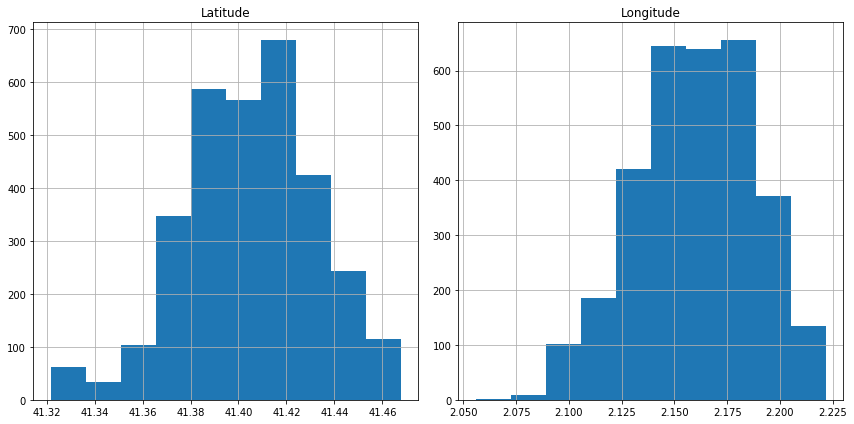

In [14]:
# print(df_unemployment.sort_values(by='Number', ascending=False).head(5))
print_uniques(df_bus_stops, 10)
# fig, (ax1, ax2) = plt.subplots(1, 2)
df_bus_stops.hist(figsize=(12,6))
# plt.xlabel("Inmigrantes o emigrantes")
# plt.ylabel("Frecuencia")
# plt.title("Incluyendo internacional")
plt.tight_layout()
plt.savefig("images/bus-stops-lat-lon")

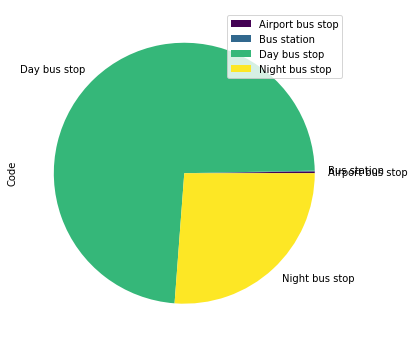

In [59]:
df_bus_stops.groupby(by="Transport").count()["Code"].plot(kind="pie", figsize=(12,6), colormap="viridis", legend=True)
plt.savefig("images/bus-stops-pie")

##### accidents

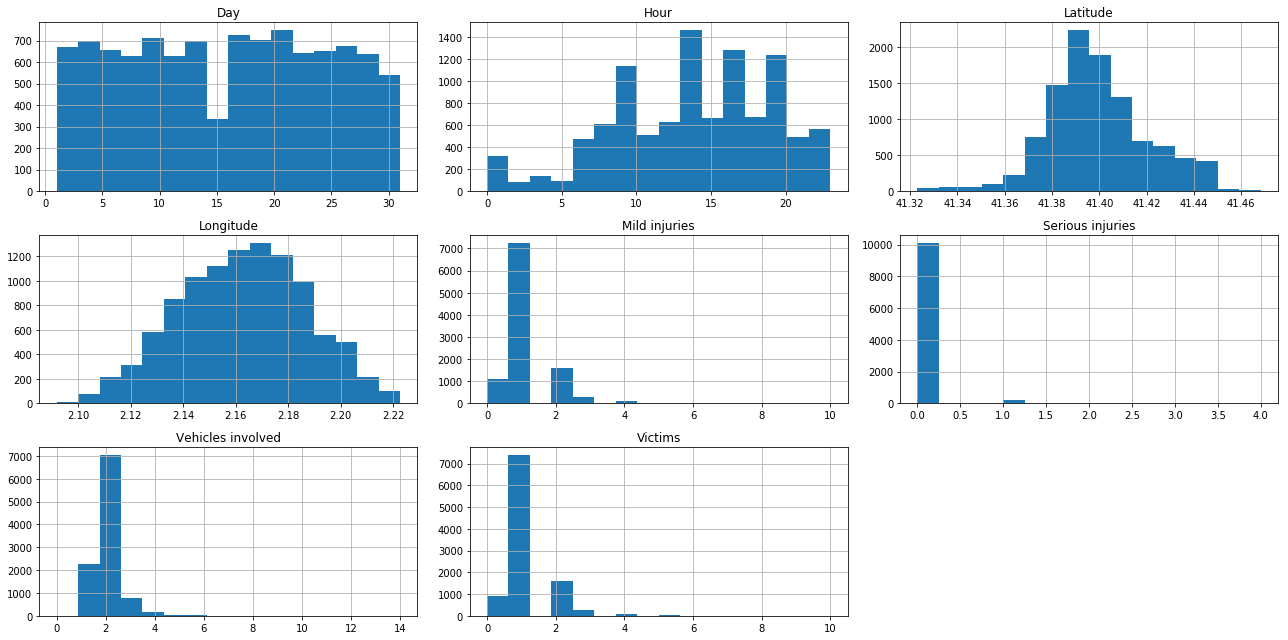

In [77]:
# print(df_unemployment.sort_values(by='Number', ascending=False).head(5))
# print_uniques(df_accidents_2017, 10)
df_accidents_2017.hist(bins=16, figsize=(18, 9))
# plt.xlabel("Inmigrantes o emigrantes")
# plt.ylabel("Frecuencia")
# plt.title("Incluyendo internacional")
plt.tight_layout()
plt.savefig("images/accidents-hist")

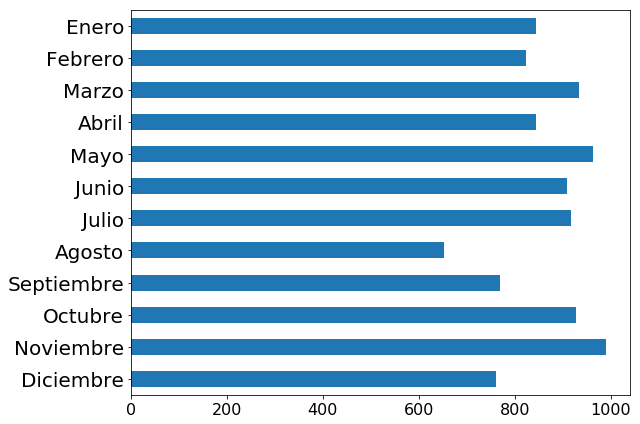

In [107]:
# df_accidents_2017["Month"].value_counts().plot(kind="barh")
translator = {1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
              9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"}
plt.yticks(fontsize=20)
plt.xticks(fontsize=16)
pd.to_datetime(df_accidents_2017.Month, format='%B', errors='coerce').dt.month.value_counts().sort_index(ascending=False).rename(index=translator).plot(kind="barh", figsize=(9,6))
plt.tight_layout()
plt.savefig("images/accidents-months")

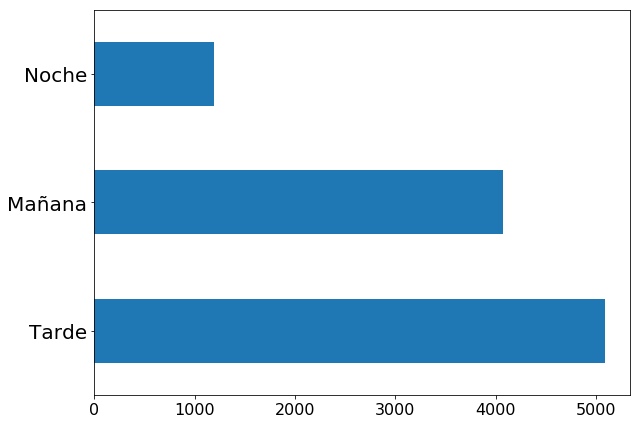

In [108]:
plt.yticks(fontsize=20)
plt.xticks(fontsize=16)
translator = {"Night": "Noche", "Morning": "Mañana", "Afternoon": "Tarde"}
df_accidents_2017["Part of the day"].value_counts().rename(index=translator).plot(kind="barh", figsize=(9, 6))
plt.tight_layout()
plt.savefig("images/accidents-part-of-the-day")

In [43]:
print(df_accidents_2017["Serious injuries"].value_counts())
print(df_accidents_2017["Mild injuries"].value_counts())
print(df_accidents_2017["Vehicles involved"].value_counts())
print(df_accidents_2017["Victims"].value_counts())

0    10116
1      207
2       15
4        1
Name: Serious injuries, dtype: int64
1     7253
2     1579
0     1082
3      273
4       99
5       31
6       11
7        7
10       2
9        1
8        1
Name: Mild injuries, dtype: int64
2     7031
1     2260
3      798
4      165
5       48
6       14
7        6
9        5
0        5
10       2
8        2
14       1
13       1
11       1
Name: Vehicles involved, dtype: int64
1     7385
2     1611
0      902
3      284
4      102
5       32
6       11
7        8
10       2
9        1
8        1
Name: Victims, dtype: int64
